In [22]:
# setting up the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv('../CW2_Datasets/Dataset1.csv')

data.head()

df = pd.DataFrame(data)

# delete id from the table
edited_df = df.drop('id', axis='columns')



In [23]:
# changing the attribute values

edited_df['sex'].replace(
    ['Male','Female'],
    [0,1],
    inplace=True  
)
edited_df['Origin'].replace(
    ['Cleveland','Hungary', 'Switzerland', 'VA Long Beach'],
    [0,1,2,3],
    inplace=True  
)
edited_df['cp'].replace(
    ['typical angina','asymptomatic', 'non-anginal', 'atypical angina'],
    [0,1,2,3],
    inplace=True  
)
edited_df['restecg'].replace(
    ['lv hypertrophy','normal', 'st-t abnormality'],
    [0,1,2],
    inplace=True  
)
edited_df['slope'].replace(
    ['downsloping','flat', 'upsloping'],
    [0,1,2],
    inplace=True  
)
edited_df['thal'].replace(
    ['fixed defect', 'normal', 'reversable defect'],
    [0,1,2],
    inplace=True  
)
edited_df['level'].replace(
    [0, 1, 2, 3, 4],
    [0, 1, 1, 1, 1],
    inplace=True
) # changing the values above 0 to 1 for binary classification
edited_df.head()



/tmp/ipykernel_1804476/682164172.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edited_df['sex'].replace(
/tmp/ipykernel_1804476/682164172.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edited_df['sex'].replace(
/tmp/ipykernel_1804476/682164172.py:8: FutureWarning: A value is trying to be 

,age,sex,Origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,level
0,63,0,0,0,145.0,233.0,True,0.0,150.0,False,2.3,0.0,0.0,0.0,0
1,67,0,0,1,160.0,286.0,False,0.0,108.0,True,1.5,1.0,3.0,1.0,1
2,67,0,0,1,120.0,229.0,False,0.0,129.0,True,2.6,1.0,2.0,2.0,1
3,37,0,0,2,130.0,250.0,False,1.0,187.0,False,3.5,0.0,0.0,1.0,0
4,41,1,0,3,130.0,204.0,False,0.0,172.0,False,1.4,2.0,0.0,1.0,0


In [24]:
# splitting the input features

X = edited_df.iloc[:,1:-1]
# print(X)
y = edited_df.iloc[:,14]
# print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, random_state=0)


In [25]:
# using random forest instead of descisionTree

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


RF models: 100


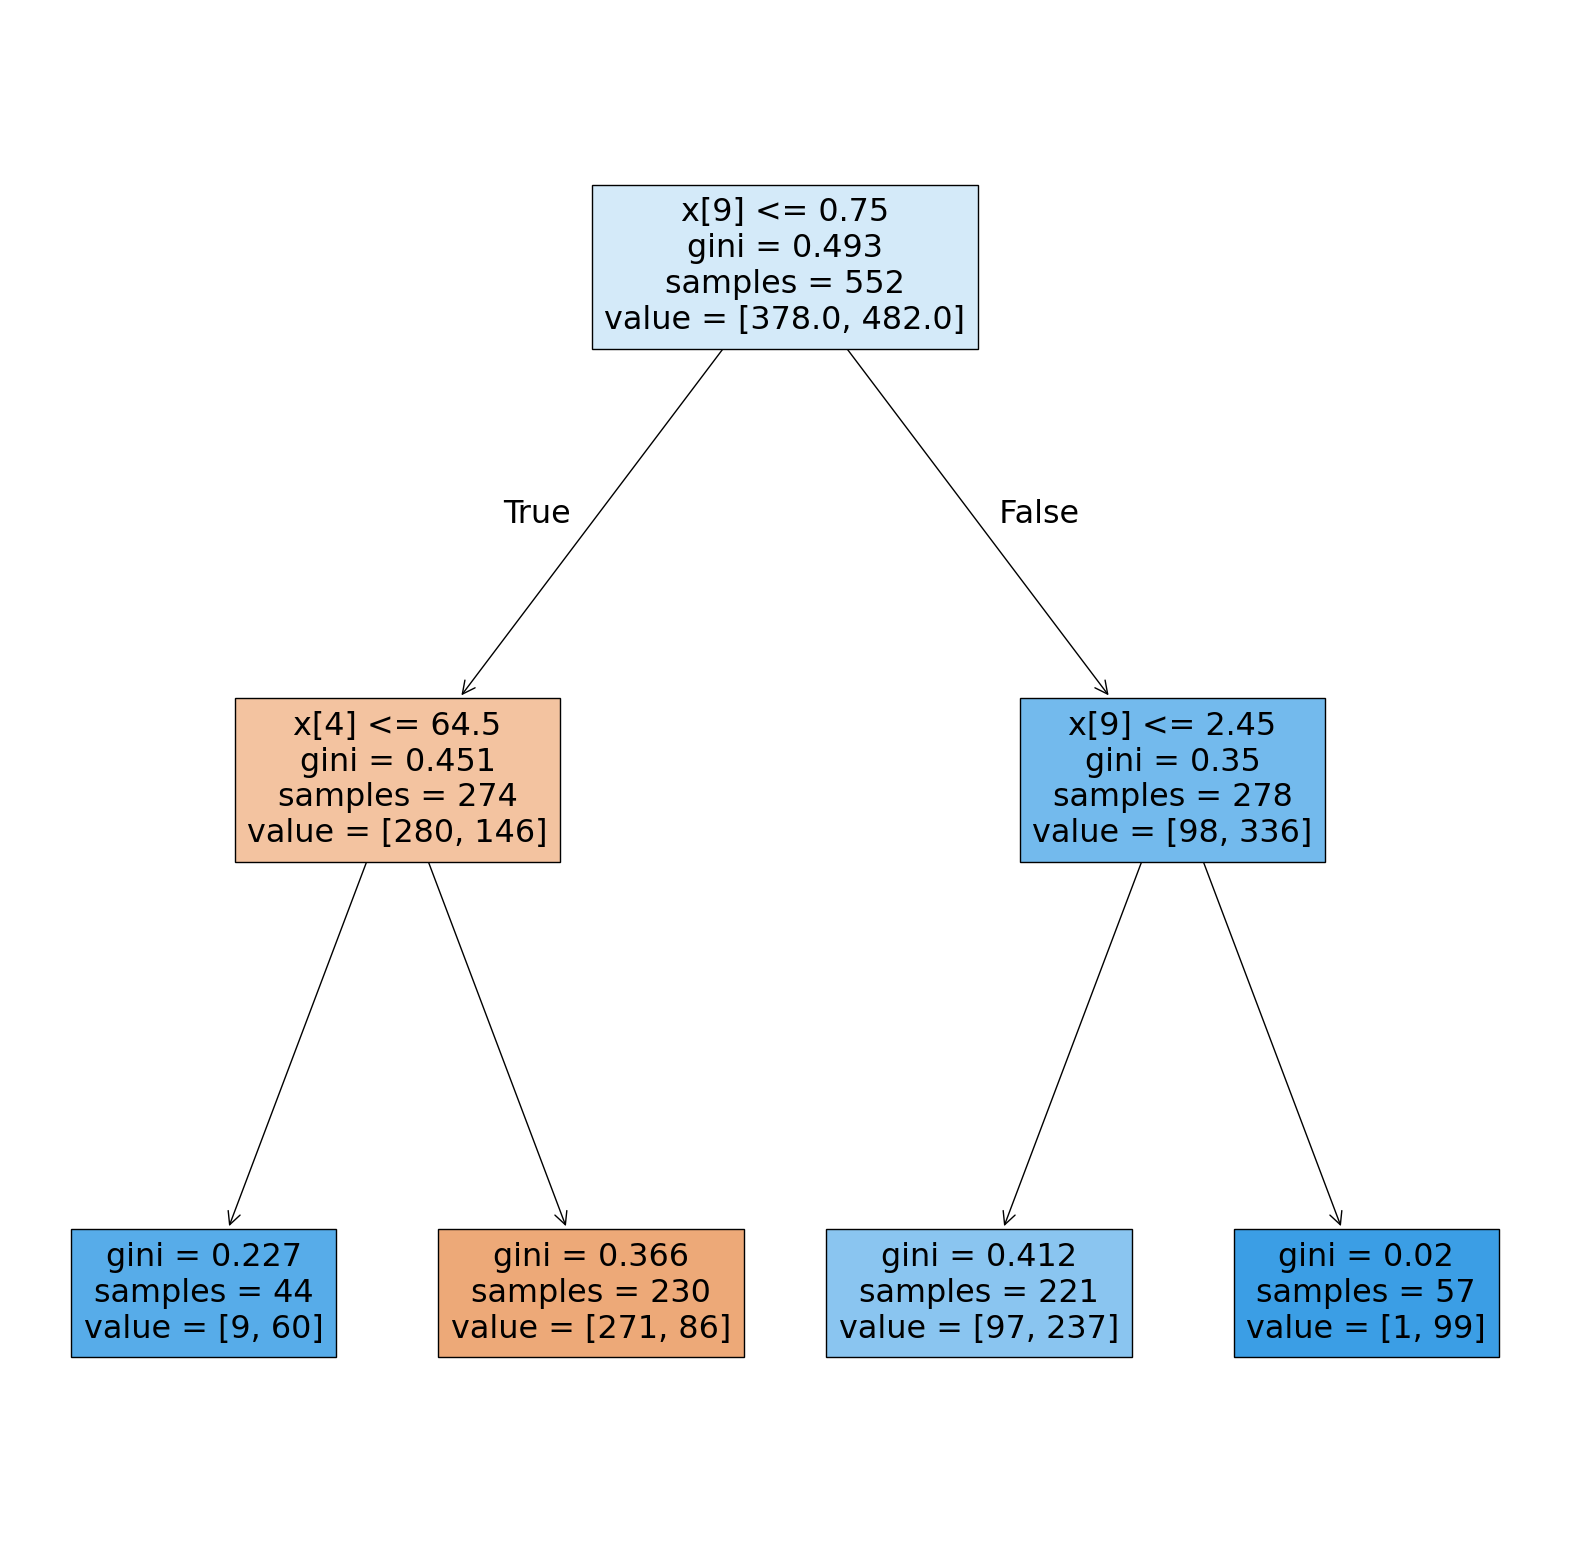

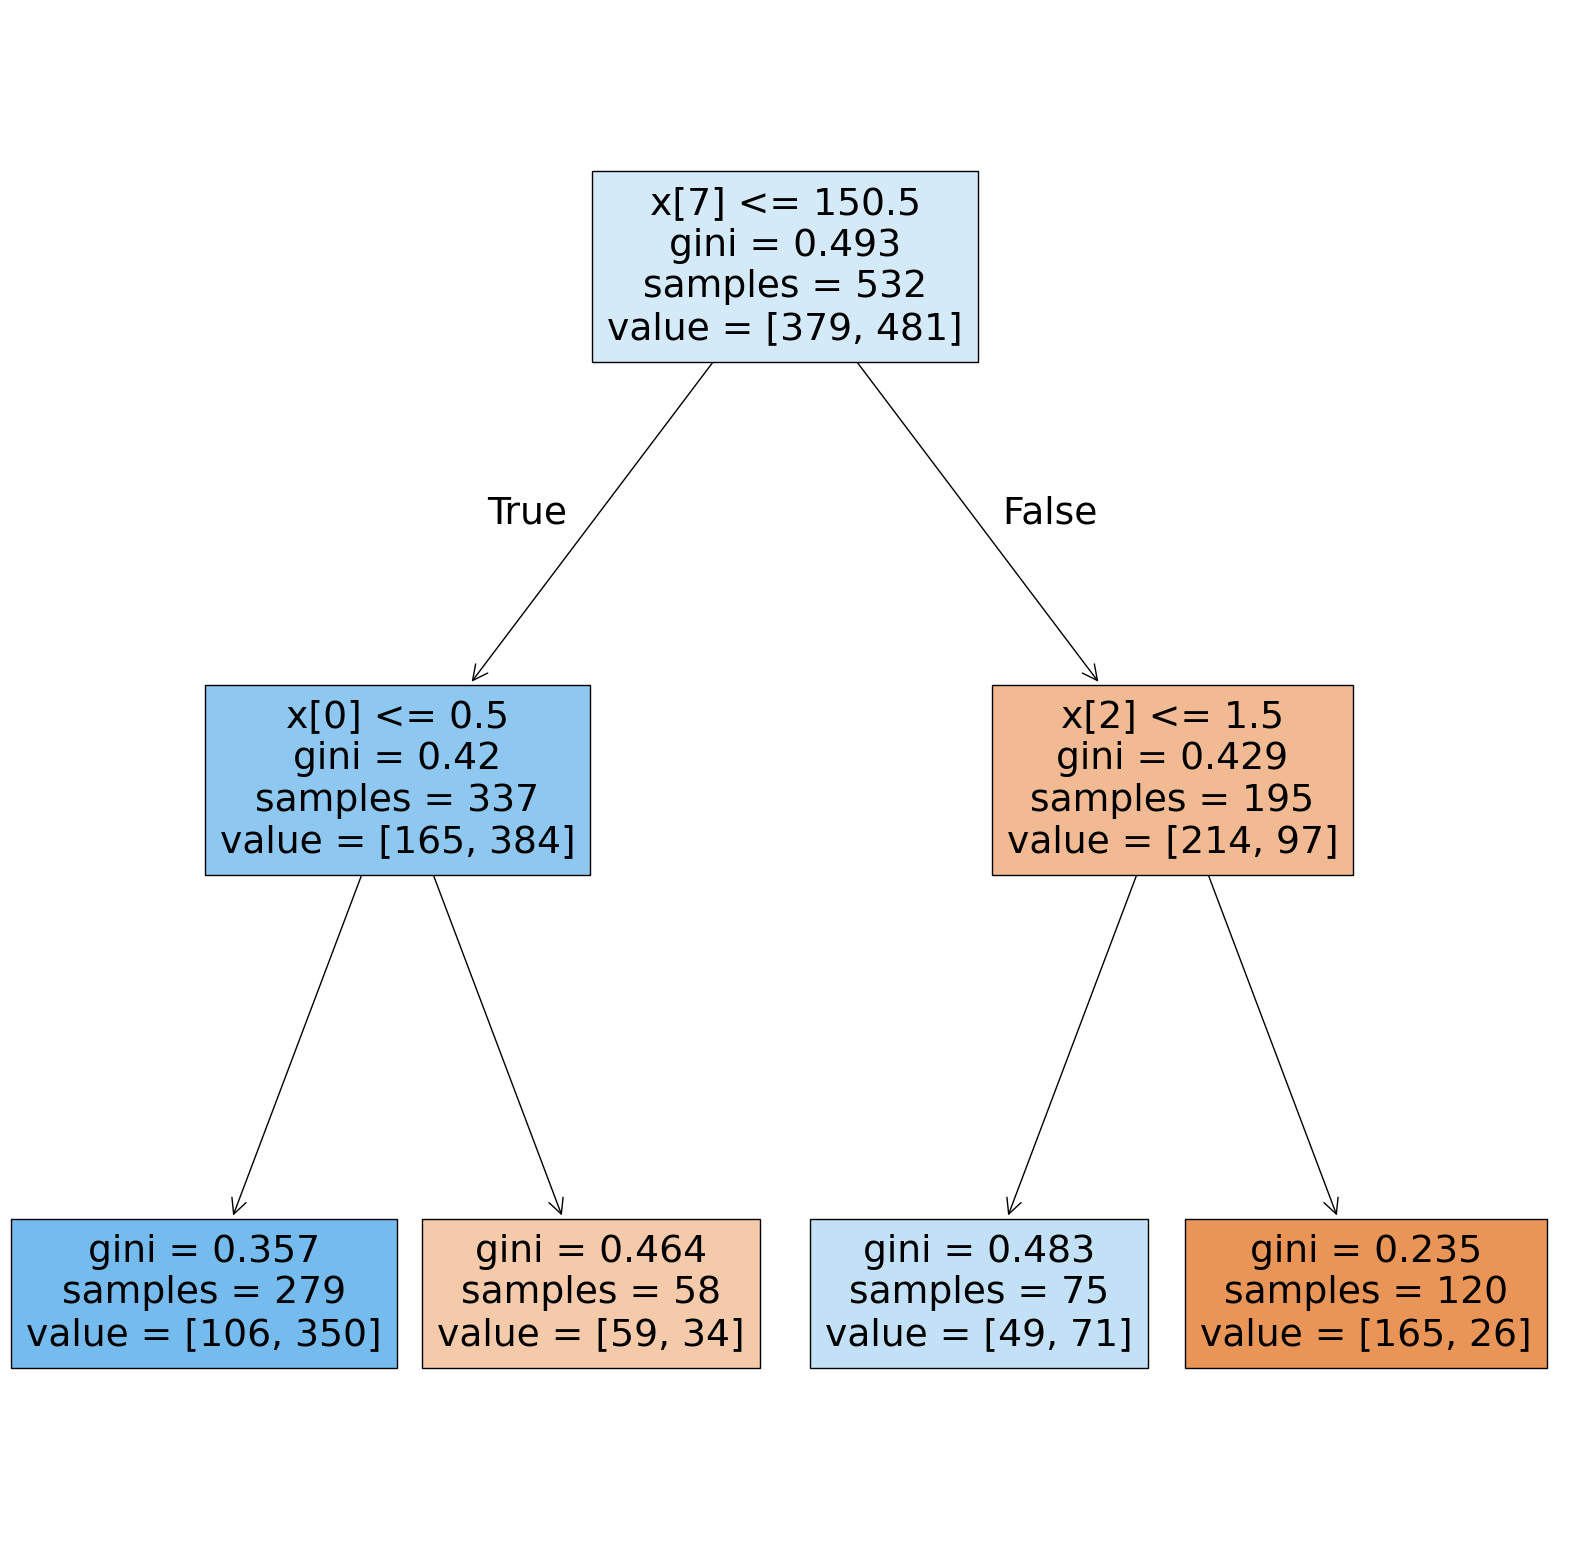

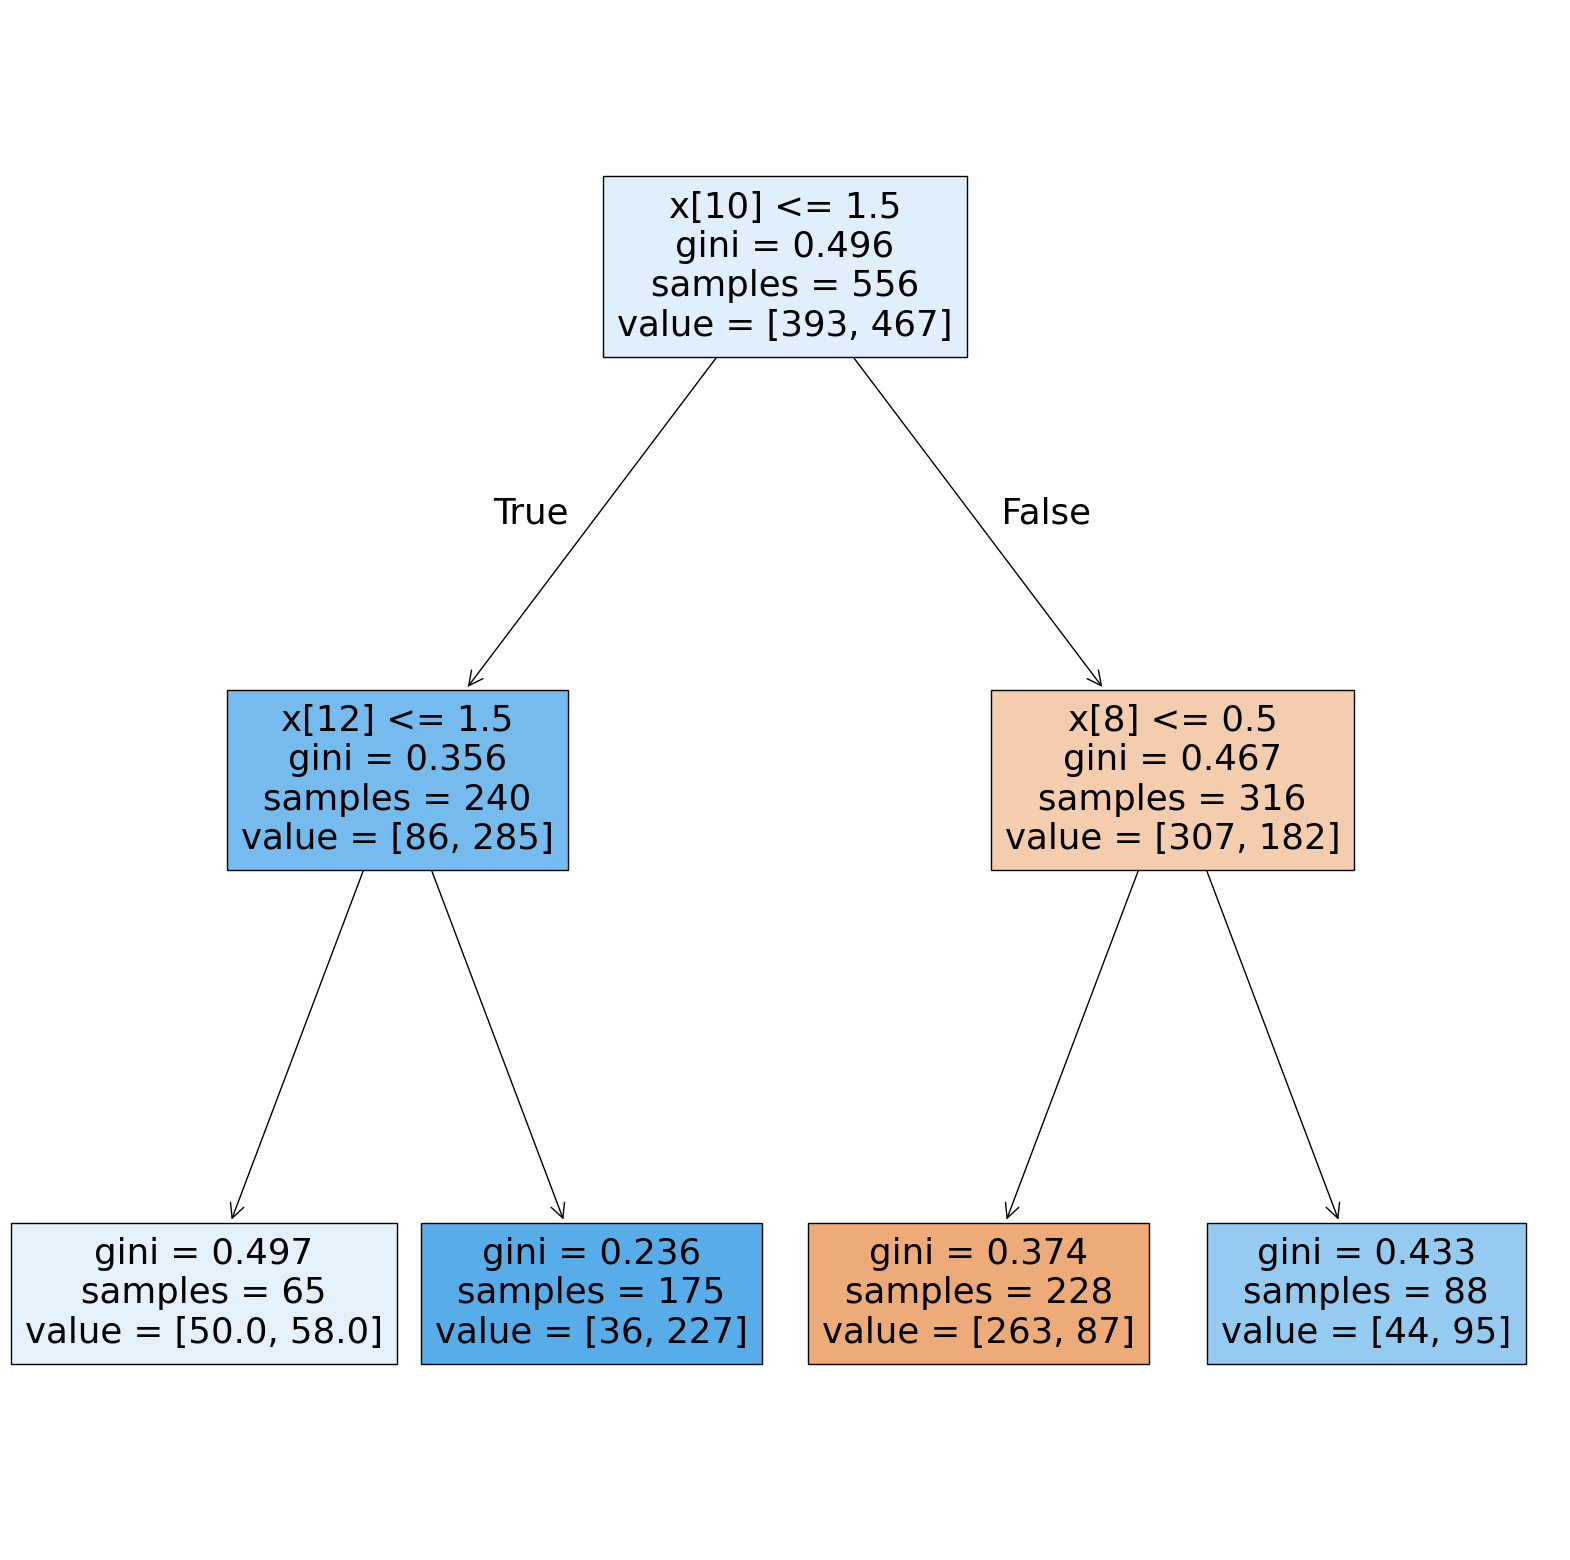

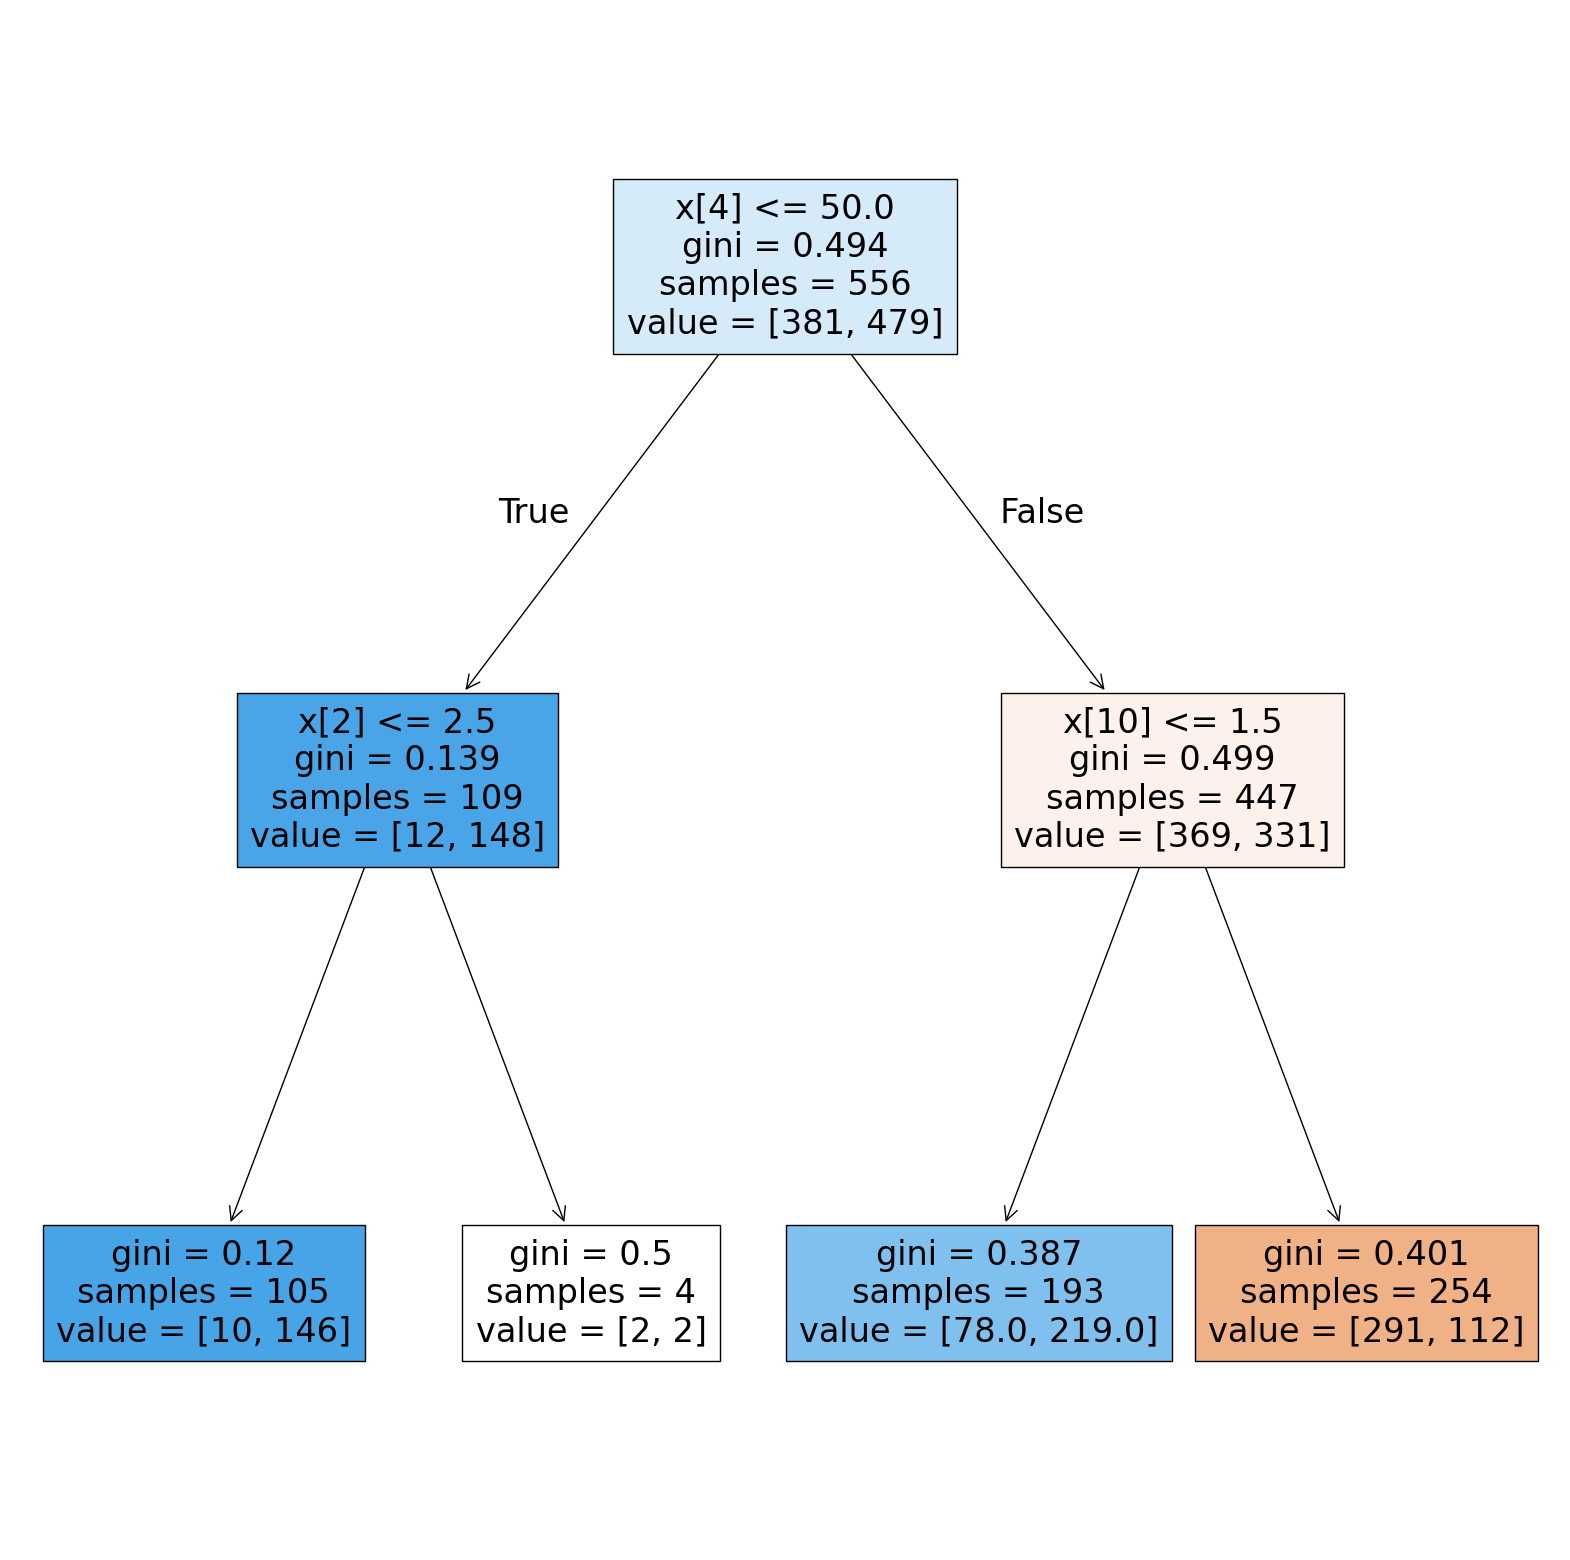

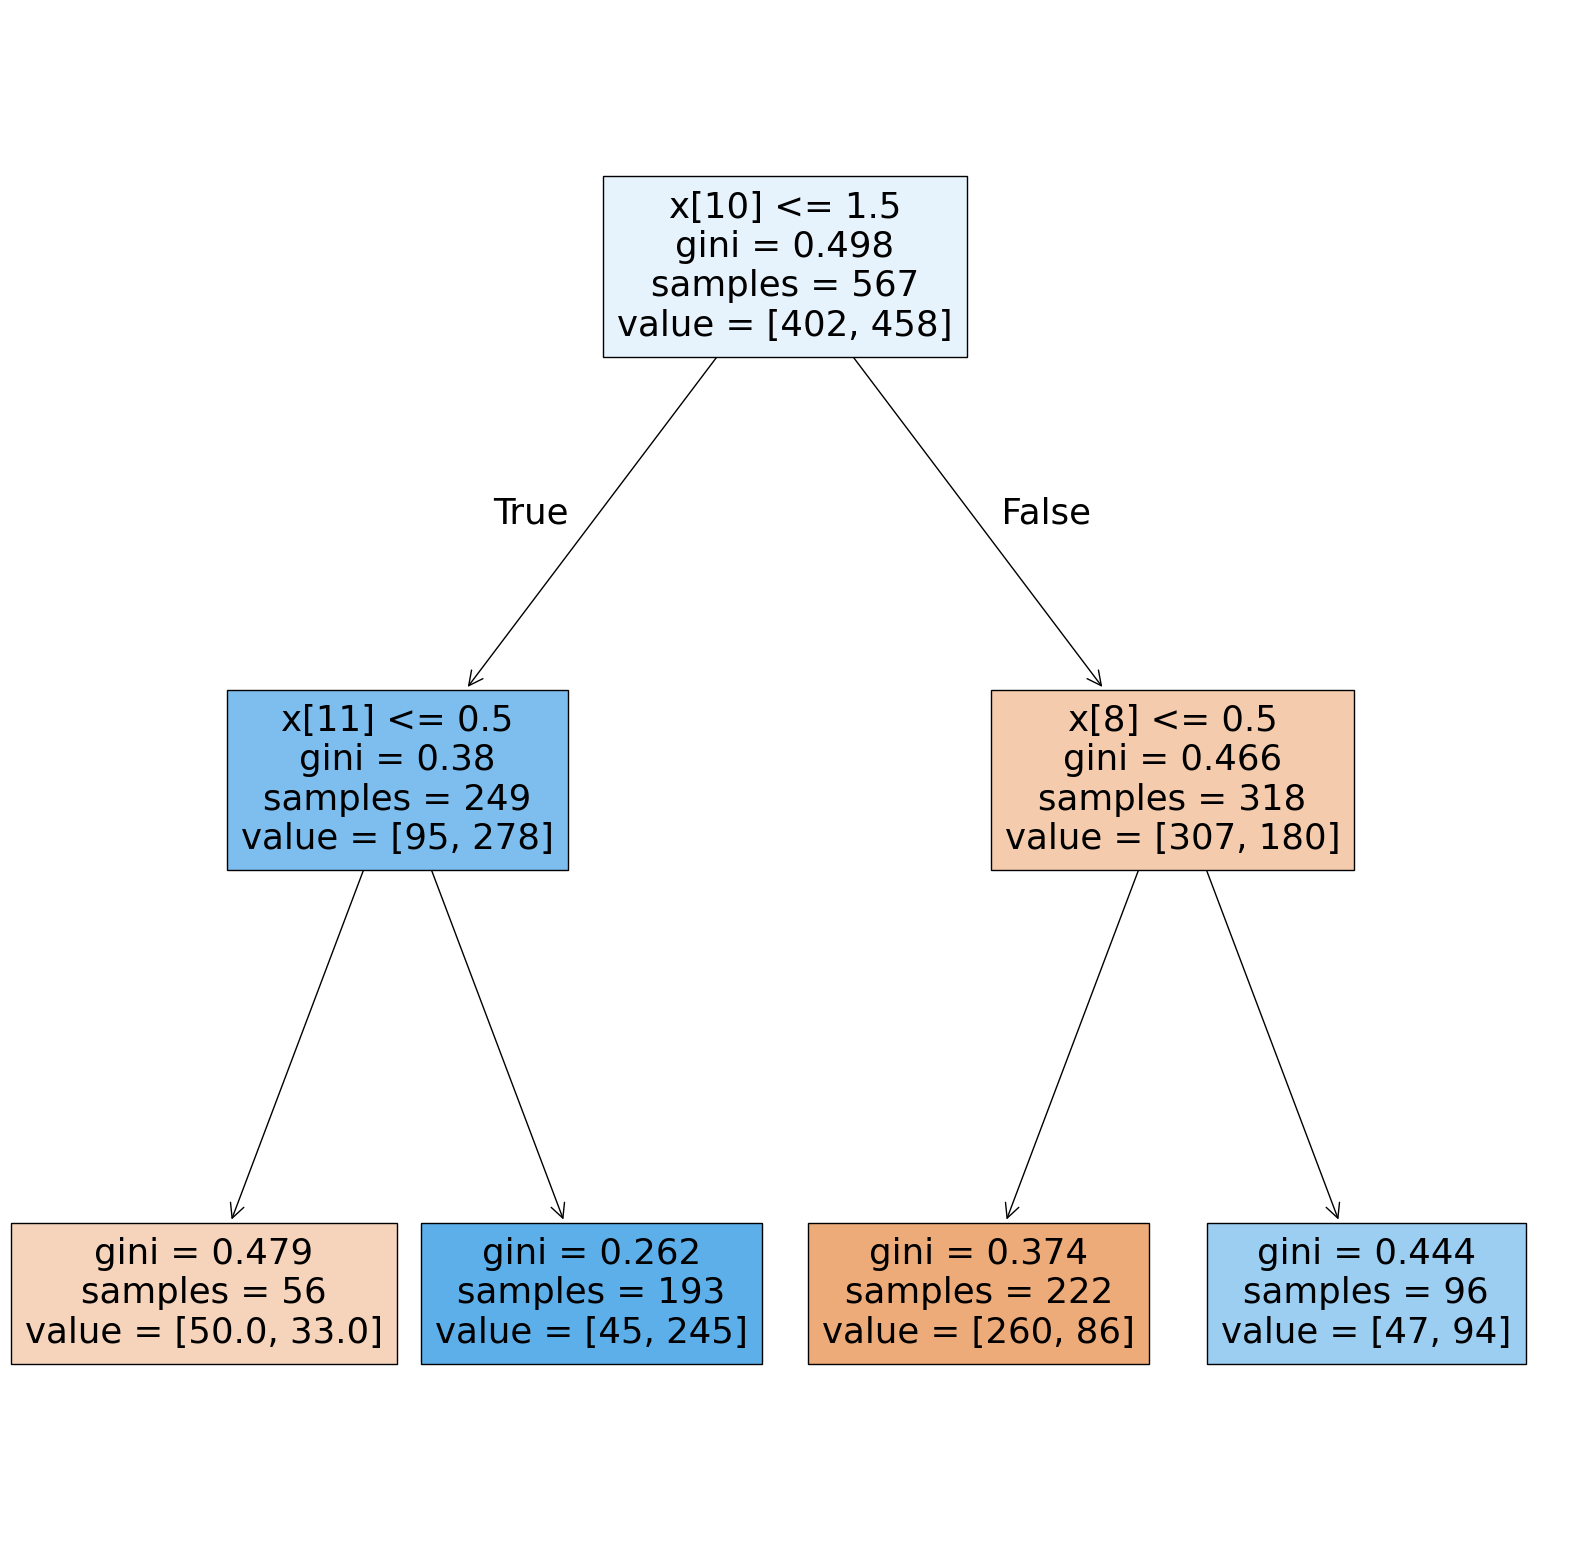

In [26]:
from sklearn import tree
from sklearn.tree import plot_tree

# number of trees in the random forest model
print(f'RF models: {len(classifier.estimators_)}')

for i in range(min(len(classifier.estimators_), 5)):

    # get each tree
    tree = classifier.estimators_[i]

    # visualise the tree
    plt.figure(figsize=(20,20))
    plot_tree(tree, filled=True)

plt.show()


In [27]:
# predict the data

Y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)

print(f'confusion matrix \n{cm}')
print(f'classification report \n{cr}')

confusion matrix 
[[23  8]
 [ 5 24]]
classification report 
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        31
           1       0.75      0.83      0.79        29

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

